### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [1]:
from scipy.io import wavfile 
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft

In [2]:
# Read the record file
rate, data = wavfile.read('Records/La_Belle_et_La_Bette.wav')

In [3]:
dt = 1/rate
T = np.linspace(0, (len(data)-1)*dt, len(data))

Text(0, 0.5, 'amplitude')

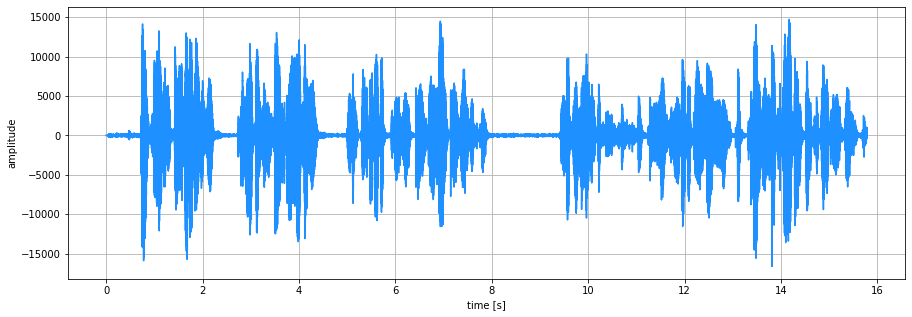

In [4]:
plt.figure(figsize = (15,5))
plt.grid()
plt.plot(T, data, color = 'dodgerblue')
plt.xlabel('time [s]')
plt.ylabel('amplitude')

In [5]:
# Do the fft
data_fft = scipy.fft.rfft(data)
data_freq = scipy.fft.rfftfreq(len(data), dt)

Text(0.5, 0, 'freq [Hz]')

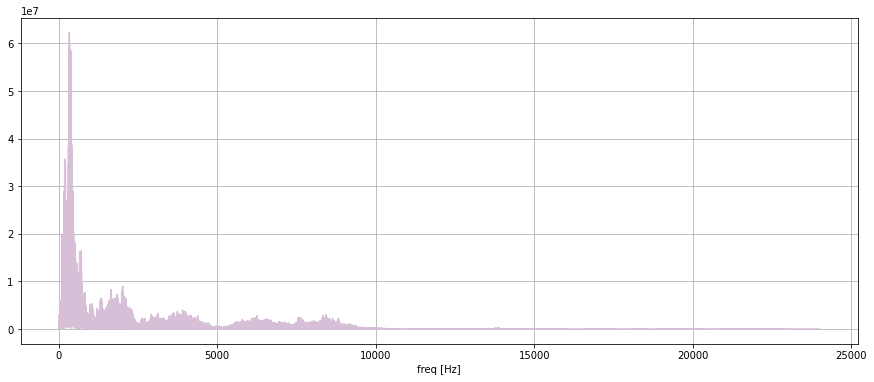

In [6]:
# Get the frequency domain
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(data_freq, np.abs(data_fft), color = 'thistle')
plt.xlabel('freq [Hz]')

In [15]:
# Roll the fft'ed data
rolled = np.roll(data_fft, 15000)
# Inverse it 
changed = (scipy.fft.irfft(rolled))*1.5

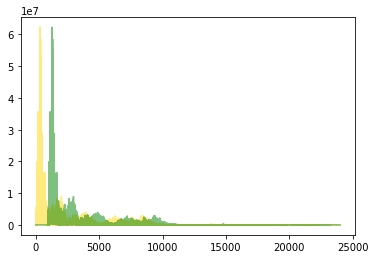

In [16]:
plt.plot(data_freq, np.abs(data_fft), color = 'gold', alpha = 0.5)
plt.plot(data_freq, np.abs(rolled), color = 'green', alpha = 0.5)

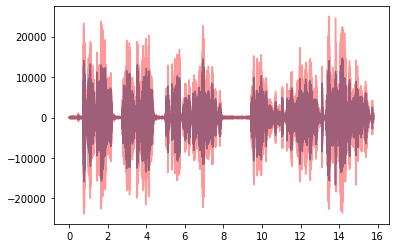

In [17]:
plt.plot(T, data, alpha = 0.7)
plt.plot(T, changed, color = 'red', alpha = 0.4)

In [18]:
wavfile.write('Records/voice1.wav', rate, np.array(changed, dtype=np.int16))

And Repeat

In [19]:
rolled2 = np.roll(data_fft, -2500)
changed2 = (scipy.fft.irfft(rolled2))*2

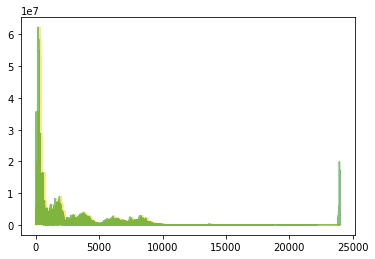

In [20]:
plt.plot(data_freq, np.abs(data_fft), color = 'gold', alpha = 0.5)
plt.plot(data_freq, np.abs(rolled2), color = 'green', alpha = 0.5)

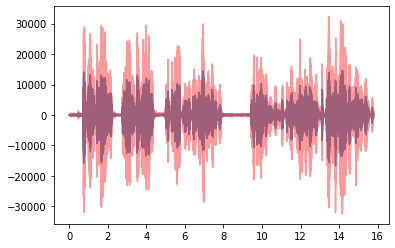

In [21]:
plt.plot(T, data, alpha = 0.7)
plt.plot(T, changed2, color = 'red', alpha = 0.4)

In [22]:
wavfile.write('Records/voice2.wav', rate, np.array(changed2, dtype=np.int16))